# Kaggle Data Visualization
- Make great data visualizations. A great way to see the power of coding!

## 4. Scatter Plots
- Leverage the coordinate plane to explore relationships between variables

In [3]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
'Setup Complete'

'Setup Complete'

### Selecting the dataset

In [5]:
zipfile = 'DataToVisualize.zip'
dataset = 'insurance.csv'

In [11]:
# Inspecting the zip file
import zipfile as zfm

with zfm.ZipFile(zipfile) as zf:
    if dataset in zf.namelist():
        print(f'Datataset "{dataset}" founded in "{zipfile}"')

Datataset "insurance.csv" founded in "DataToVisualize.zip"


In [7]:
# Inspecting insurance.csv
with zfm.ZipFile(zipfile) as zf:
    #print(zf.namelist())
    numln = 1
    for ln in zf.open(dataset):
        print(ln)
        if numln == 5: break
        numln += 1

b'age,sex,bmi,children,smoker,region,charges\r\n'
b'19,female,27.9,0,yes,southwest,16884.924\r\n'
b'18,male,33.77,1,no,southeast,1725.5523\r\n'
b'28,male,33,3,no,southeast,4449.462\r\n'
b'33,male,22.705,0,no,northwest,21984.47061\r\n'


### Load & Examine the Data

In [14]:
with zfm.ZipFile(zipfile) as zf:
    df = pd.read_csv(zf.open(dataset))
print(df.shape)
#df.describe()
df.iloc[[0, 1, 9, -9, -2, -1]]

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
1,18,male,33.77,1,no,southeast,1725.55230
9,60,female,25.84,0,no,northwest,28923.13692
1329,52,male,38.60,2,no,southwest,10325.20600
1336,21,female,25.80,0,no,southwest,2007.94500
1337,61,female,29.07,0,yes,northwest,29141.36030


### Scatter plots
1. relation between charges and bmi

Text(0.5, 1.0, 'Charges - bmi (body mass index) correlation')

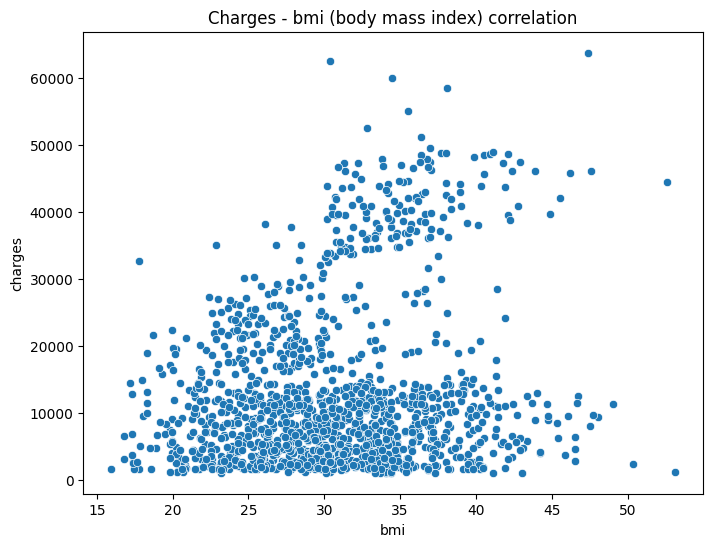

In [17]:
fig, axscat = plt.subplots(figsize=(8,6))
sns.scatterplot(x=df.bmi, y=df.charges, ax=axscat)
axscat.set_title('Charges - bmi (body mass index) correlation')

The scatterplot above suggests that body mass index (BMI) and insurance charges are positively correlated, where customers with higher BMI typically also tend to pay more in insurance costs. (This pattern makes sense, since high BMI is typically associated with higher risk of chronic disease.)

To double-check the strength of this relationship, you might like to add a regression line, or the line that best fits the data. We do this by changing the command to sns.regplot.

Text(0.5, 1.0, 'Charges - bmi (body mass index) correlation w/ regression line')

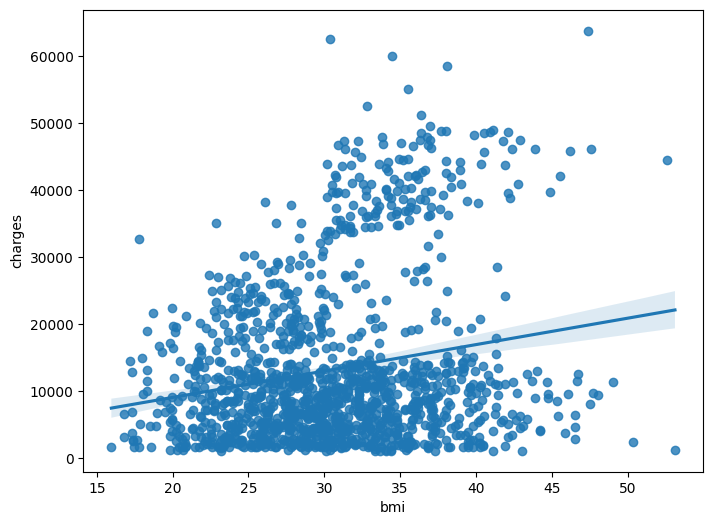

In [22]:
### regression line
fig, axscat1 = plt.subplots(figsize=(8,6))
sns.regplot(x=df.bmi, y=df.charges, ax=axscat1)
axscat.set_title('Charges - bmi (body mass index) correlation w/ regression line')

### Color-coded scatter plots
We can use scatter plots to display the relationships between (not two, but...) three variables! One way of doing this is by color-coding the points.

For instance, to understand how smoking affects the relationship between BMI and insurance costs, we can color-code the points by 'smoker', and plot the other two columns ('bmi', 'charges') on the axes.

Text(0.5, 1.0, 'Charges - bmi (body mass index) correlation')

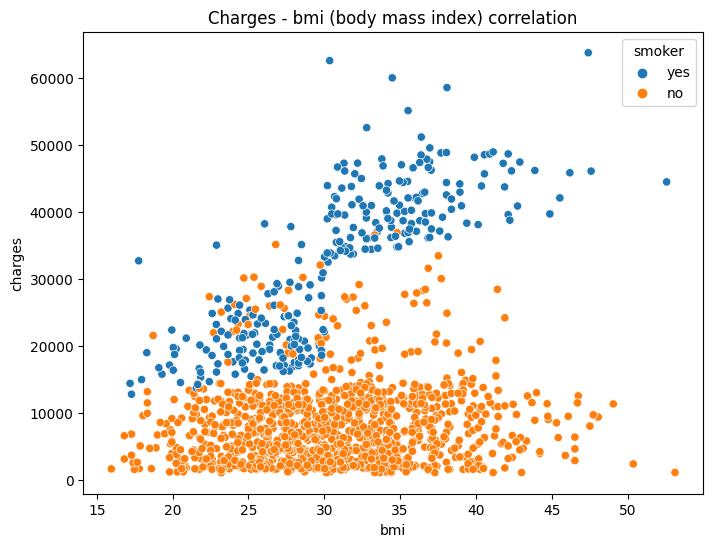

In [23]:
fig, axscat = plt.subplots(figsize=(8,6))
sns.scatterplot(x=df.bmi, y=df.charges, hue=df.smoker, ax=axscat)
axscat.set_title('Charges - bmi (body mass index) correlation')

This scatter plot shows that while nonsmokers to tend to pay slightly more with increasing BMI, smokers pay MUCH more.

To further emphasize this fact, we can use the sns.lmplot command to add two regression lines, corresponding to smokers and nonsmokers. (You'll notice that the regression line for smokers has a much steeper slope, relative to the line for nonsmokers!)

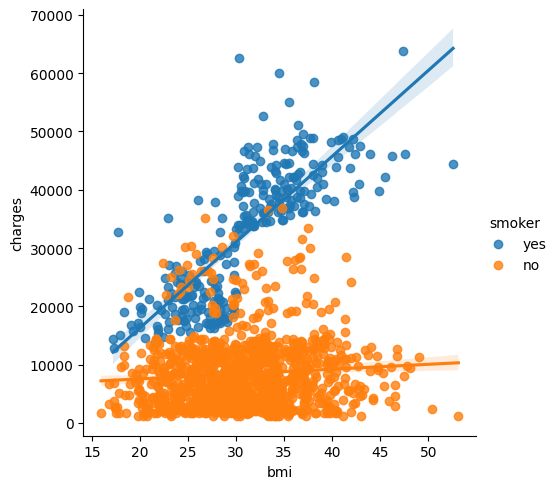

In [31]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df)

__Technical Note:__ The regplot() and lmplot() functions are closely related, but the former is an axes-level function while the latter is a figure-level function that combines regplot() and FacetGrid.    
if you are trying to pass to a "figure level" method in seaborn (for example lmplot, catplot / factorplot, jointplot) you can and should specify this within the arguments using height and aspect.

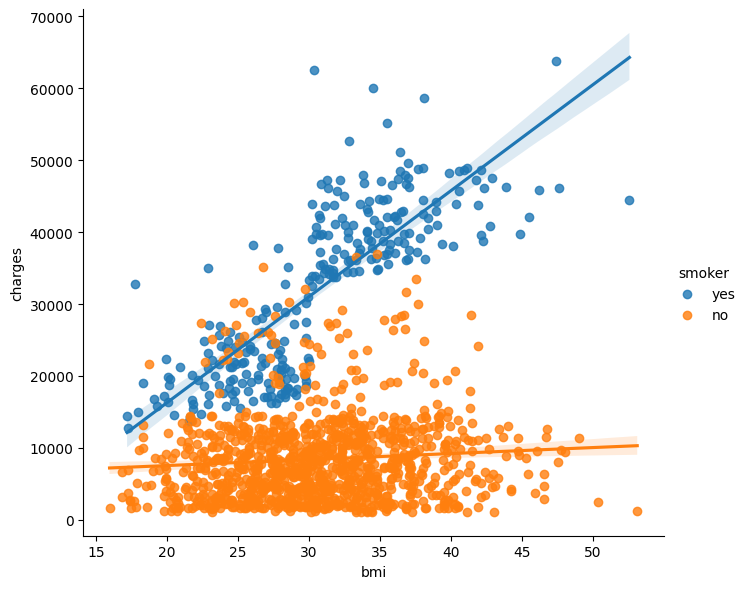

In [37]:
# lmplot is 'figure-level' funct - regplot is 'axes-level'
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, height=6, aspect=16/14)

Finally, there's one more plot that you'll learn about, that might look slightly different from how you're used to seeing scatter plots. Usually, we use scatter plots to highlight the relationship between two continuous variables (like "bmi" and "charges"). However, we can adapt the design of the scatter plot to feature a categorical variable (like "smoker") on one of the main axes. We'll refer to this plot type as a categorical scatter plot, and we build it with the sns.swarmplot command.

c:\Users\jmonti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='smoker', ylabel='charges'>

c:\Users\jmonti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


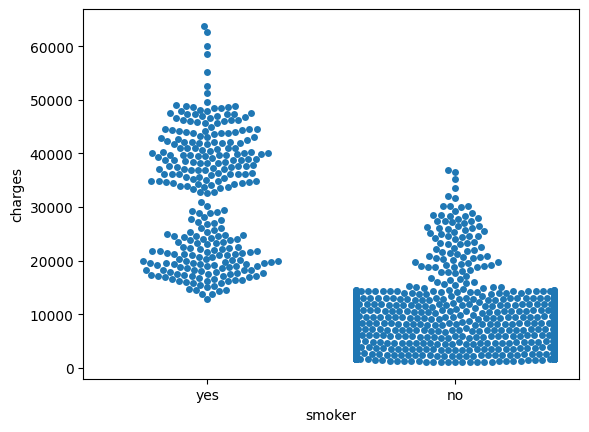

In [42]:
sns.swarmplot(x=df['smoker'], y=df['charges'])

<AxesSubplot: xlabel='smoker', ylabel='charges'>

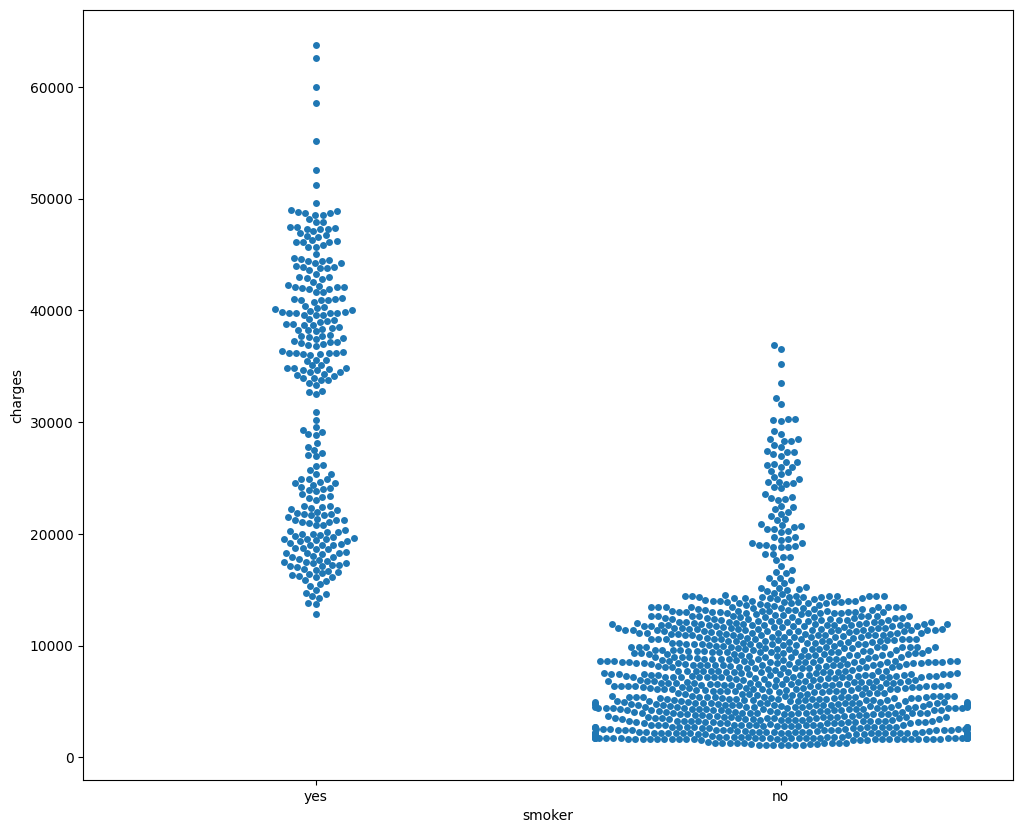

In [41]:
fig, axswarm = plt.subplots(figsize=(12,10))
sns.swarmplot(x=df['smoker'], y=df['charges'], ax=axswarm)